# **PREDICTING CREDIT RISK**

**BUSSINES UNDERSTANDING**

Credit risk is when a lender lends money to a borrower but may not be paid back. Lenders go to great lengths to understand a borrower's financial health and to quantify the risk that the borrower may trigger an event of default in the future.
This leds to lenders seek to a way to managecredit risk by designing measurement tool to quantify the risk of default, thenby employing strategies to minimise loan loss in event a default does occur.

**objective**


1.   Develop a model that can predict the customers who can default the loan given
2.  Identify which factors causes customers to default their loan

1.  be able to give recommendation and identify customers who can default their loan
2.   Develop a model that can be used to predict defaulters.






**metric of success**

The best model will be considered a success when metric of sucess is 0.8

The model should have an accuracy score of above 80 to be consided as a success.

1.   confusion metric

1.   precision and recall

1.   F1- score
2.   AU-ROC




**Data understanding**

loading the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.mertic ImportWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')





In [ ]:
#import the data
df = pd.read_csv("/content/credit_risk_dataset.csv.zip")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# Find the highest value in the 'person_age' column
max_value = df['person_age'].max()

print(f"The highest value in the 'person_age' column is: {max_value}")

The highest value in the 'person_age' column is: 144


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# check for missing values
df.isnull().sum().sort_values(ascending= False)

loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
#unique values in loan_status
df['loan_status'].unique()

array([1, 0])

In [ ]:
#checking no. of each value
df.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [ ]:
#checking unique values in loan_grade clmn
#df.loan_grade.nunique(dropna=True)

df.loan_grade.unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# checking the categorical columns
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 4 categorical variables

The categorical variables are :

 ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['person_age', 'person_income', 'loan_amnt', 'loan_status', 'cb_person_cred_hist_length']


The data 'Credit Risk Dataset' a total of 12 columns and 32581 rows. some of the columns have categorical values(obj) but majority are integers(int). Column loan_int_rate has missing values : 3116 and person_emp_length has : 895 missing rows. The target column(loan_status has value 0 for non-defaulters and 1 for defaulters.

**EXPLORATORY DATA ANALYSIS (EDA)**

---



**Data Preprocessing**

In [ ]:
#Replace missing values in loan_int_rate with mean
df['loan_int_rate']= df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [ ]:
#drop rows with missing values
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
#changing float colmn to int64
columns = ['person_emp_length','loan_int_rate','loan_percent_income']
df[columns]= df[columns].astype('int64')

In [ ]:
# Remove duplicate lines if any
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31527 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   person_age                  31527 non-null  int64 
 1   person_income               31527 non-null  int64 
 2   person_home_ownership       31527 non-null  object
 3   person_emp_length           31527 non-null  int64 
 4   loan_intent                 31527 non-null  object
 5   loan_grade                  31527 non-null  object
 6   loan_amnt                   31527 non-null  int64 
 7   loan_int_rate               31527 non-null  int64 
 8   loan_status                 31527 non-null  int64 
 9   loan_percent_income         31527 non-null  int64 
 10  cb_person_default_on_file   31527 non-null  object
 11  cb_person_cred_hist_length  31527 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 3.1+ MB


In [ ]:
#obj_columns=df['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'].tolist()
#obj_columns=df['person_home_ownership'].tolist()
#obj_columns

In [ ]:
#checking for unique values contained in the columns
#columns = ['person_home_ownership','loan_grade','loan_intent','cb_person_default_on_file']
print(df['person_home_ownership'].unique())
print(df['loan_grade'].unique())
print(df['loan_intent'].unique())
print(df['cb_person_default_on_file'].unique)

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['D' 'B' 'C' 'A' 'E' 'F' 'G']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
<bound method Series.unique of 0        Y
1        N
2        N
3        N
4        Y
        ..
32576    N
32577    N
32578    N
32579    N
32580    N
Name: cb_person_default_on_file, Length: 31527, dtype: object>


In [ ]:
#Drop a loan_percent_income column
df.drop(['loan_percent_income'], axis=1, inplace=True)


Droping the loan_percent_income as it seem it has no major relation/effect on the target variable. This helps to avoid having noise and also avoid reducation on the model accuracy.

In [ ]:
sorted(df['loan_grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

**Data Visualisation**

start by visualizing loan_status as its our target variable

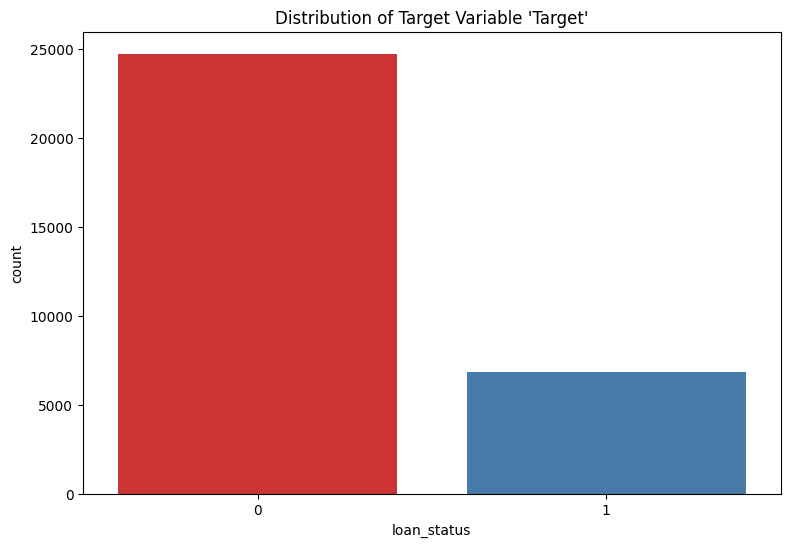

In [ ]:
plt.figure(figsize=(9, 6))
sns.countplot(df, x='loan_status', palette='Set1')
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()


The visual shows two classes ;Non-Defaulters as the majority class and Defaulters as the minority class. This indicate the data is imbalanced which can lead to bais and inaccurate perdiction on some Ml algorithms which are sensitive to it

In [ ]:
#visualize loan_status
#f,ax=plt.subplots(1,2,figsize=(18,8))

#ax[0] = df['loan_status'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
#ax[0].set_title('loan_status')


#f, ax = plt.subplots(figsize=(6, 8))
#ax[1] = sns.countplot(x="loan_status", data=df, palette="Set1")
#ax[1].set_title("Frequency distribution of loan_status variable")

#plt.show()

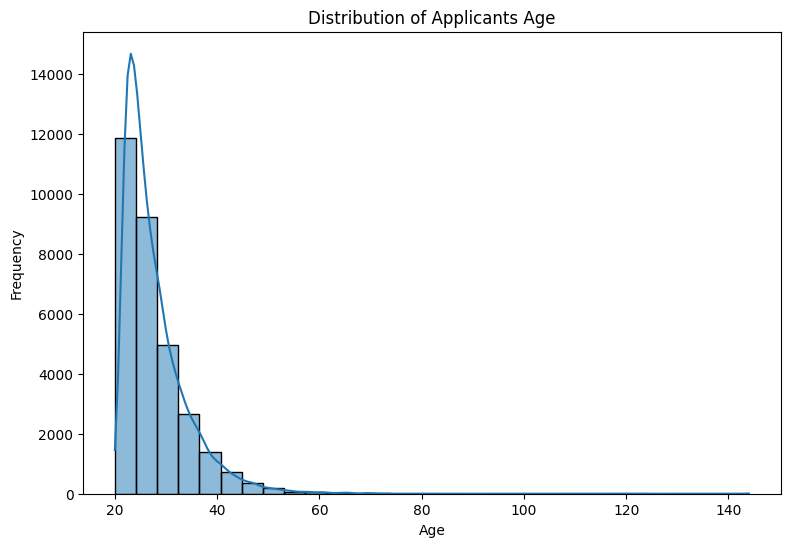

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(df, x='person_age', bins=30, kde=True, palette='Set2')
plt.title('Distribution of Applicants Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

The graph show the distribution of customers age. Majority of the customers are age between 20 -40 years. The graph is skwed to the left towards the age of 20 showing that moajority are on the bracket of 20+ years.

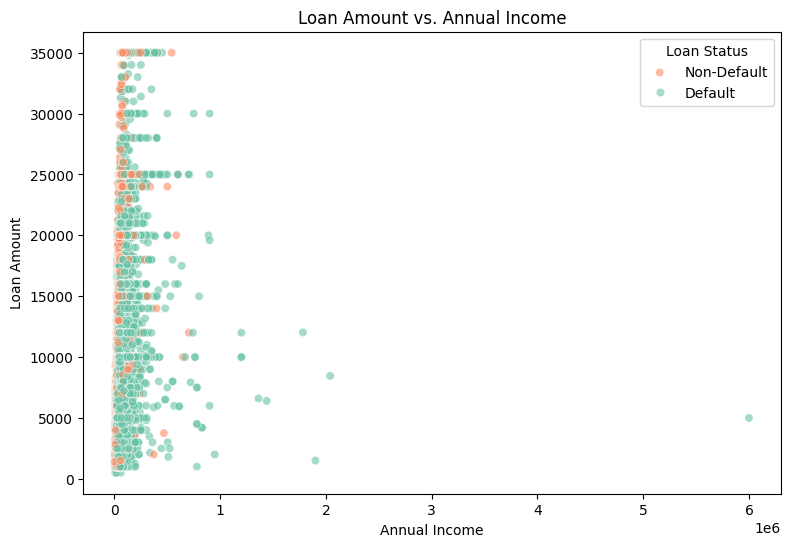

In [ ]:
plt.figure(figsize=(9, 6))
sns.scatterplot(df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.6, palette='Set2')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

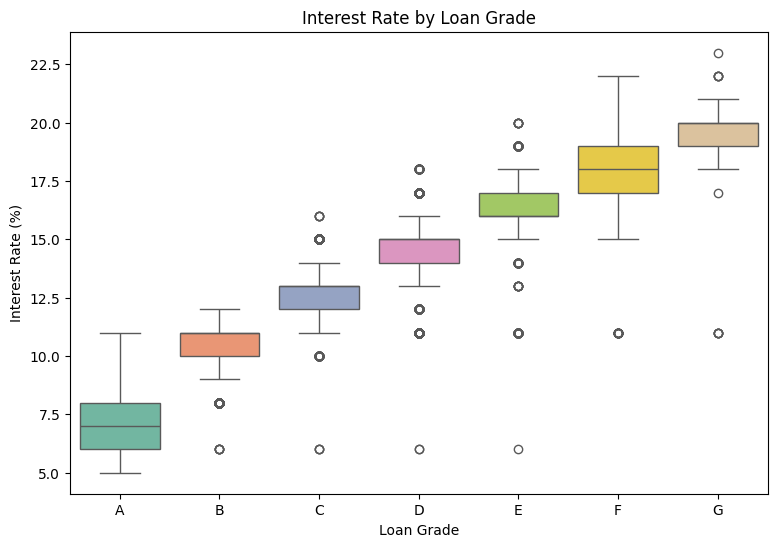

In [ ]:
plt.figure(figsize=(9, 6))
grade_order = sorted(df['loan_grade'].unique())
sns.boxplot(df, x='loan_grade', y='loan_int_rate',order= grade_order, palette='Set2')
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.grid(False)
plt.show()

In this boxplot chart, we can analyze the relationship between the interest rate and the loan grade. The boxplot allows us to visualize the distribution of interest rates for each loan grade, highlighting the median, quartiles and the presence of outliers. Observing the graph, it is possible to identify how interest rates vary between different loan levels, highlighting which levels have greater or lesser dispersion. Additionally, the chart gives us insights into the consistency of rates applied across each loan category and can reveal important trends for risk assessment and credit policies.

In [ ]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6247
MEDICAL              5868
VENTURE              5521
PERSONAL             5348
DEBTCONSOLIDATION    5044
HOMEIMPROVEMENT      3499
Name: count, dtype: int64

In [ ]:
#sorted(df['loan_intent'].value_counts())

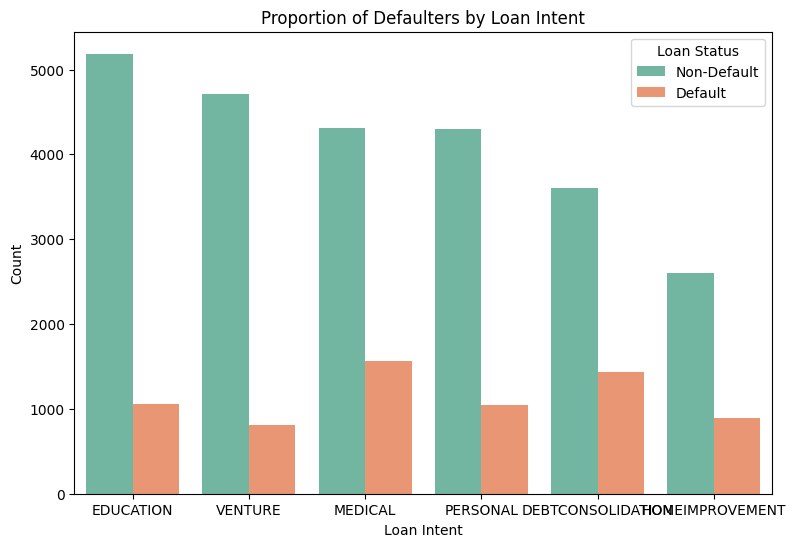

In [ ]:
plt.figure(figsize=(9, 6))
intent_order= ['EDUCATION','VENTURE','MEDICAL','PERSONAL','DEBTCONSOLIDATION','HOMEIMPROVEMENT']
sns.countplot(df, x='loan_intent', order= intent_order, hue='loan_status', palette='Set2')
plt.title('Proportion of Defaulters by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

For loan intent column, those who seek loan for medical purpose have a higher risk of defaulting loans while those seeking for venture have low risk of defaulting their loans.

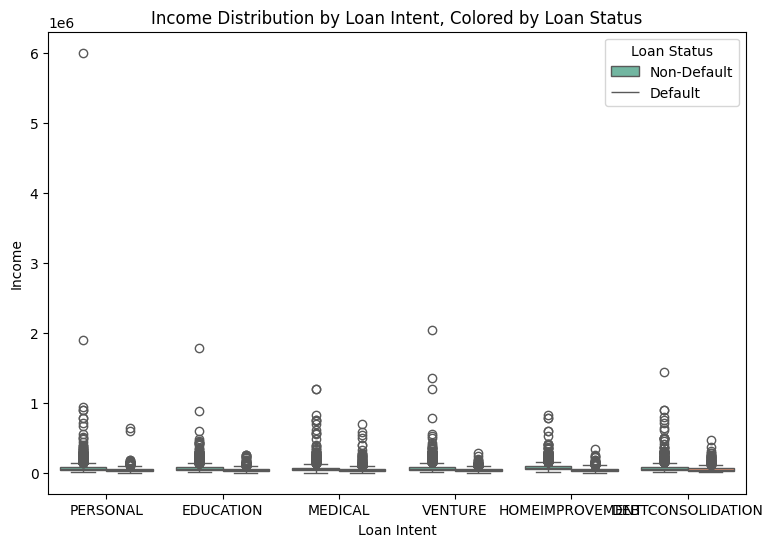

In [ ]:
plt.figure(figsize=(9, 6))
sns.boxplot(df, x='loan_intent', y='person_income', hue='loan_status', palette='Set2')
plt.title('Income Distribution by Loan Intent, Colored by Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Income')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

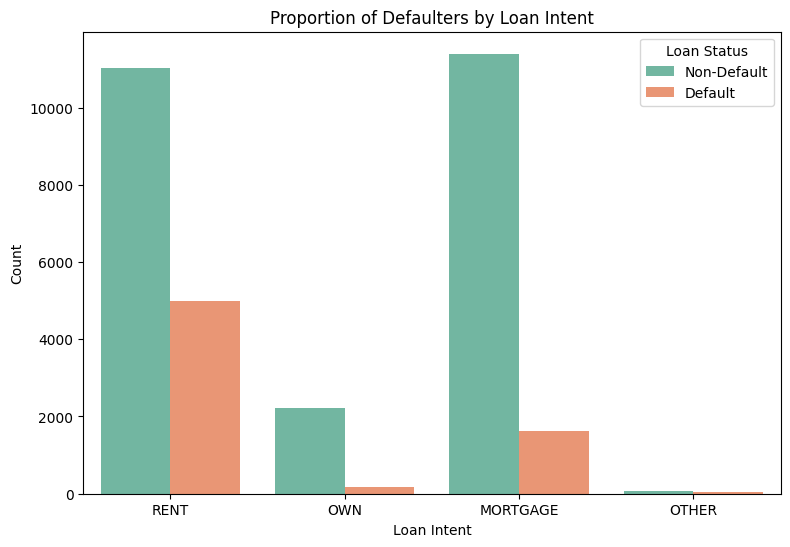

In [ ]:
plt.figure(figsize=(9, 6))
sns.countplot(df, x='person_home_ownership', hue='loan_status', palette='Set2')
plt.title('Proportion of Defaulters by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

Those who rent houses are are at a higher rate to defaults loans followed by those paying morgages. People who own houses have low rate of defaulting their loans.

In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 7 numerical variables

The numerical variables are :

 ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'cb_person_cred_hist_length']


In [ ]:
#Let's check for outliers in the numerical columns
#for i in numerical:
 #   sns.boxplot(x = df[i][1:],data=df.iloc[1:], palette='Set1')
 #   plt.title("The boxchart for {}".format(i))
 #   plt.show()

From the box plot we can see that there are a number of outliers in yhe columns : person_age, person_income and employment_length.

Solution is to drop the outliers from the columns.

Showing the outliers on the specified columns

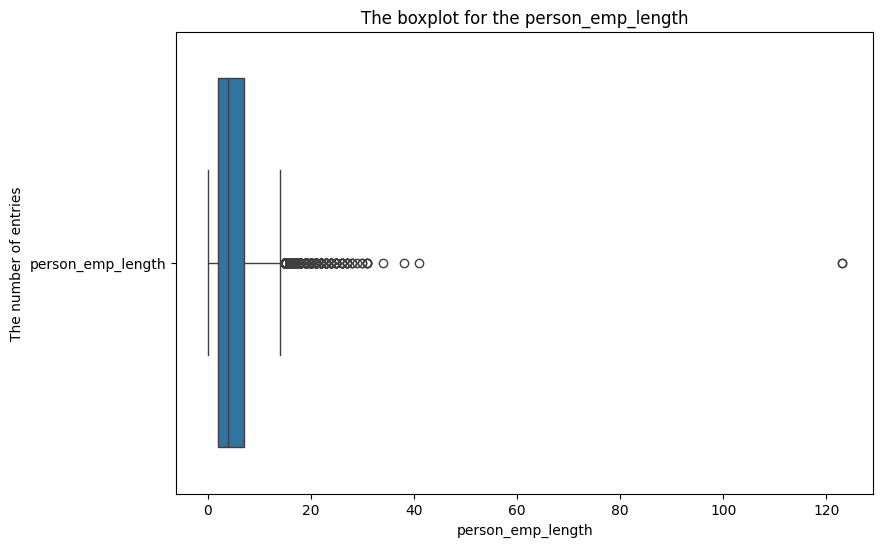

In [ ]:
#Box plot showing outliers on person_emp_length
plt.figure(figsize=(9,6))
plt.title('The boxplot for the person_emp_length')
sns.boxplot(df[['person_emp_length']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('person_emp_length')
plt.show()

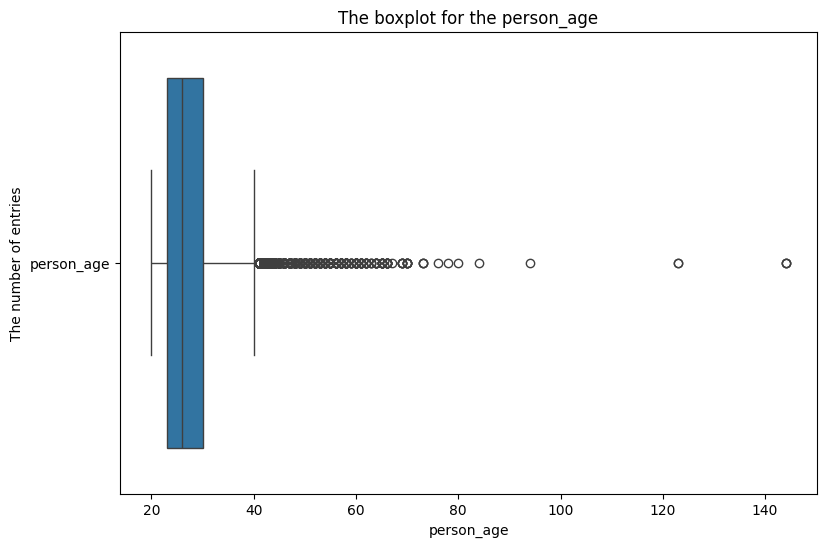

In [ ]:
#Box plot showing outliers on person_age column
plt.figure(figsize=(9,6))
plt.title('The boxplot for the person_age')
sns.boxplot(df[['person_age']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('person_age')
plt.show()

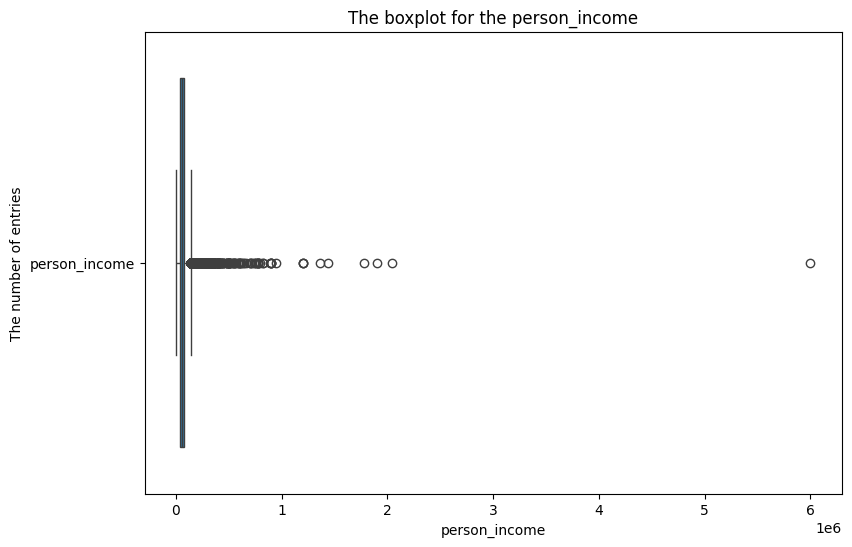

In [ ]:
#boxplot showing outliers on persons_age column
plt.figure(figsize=(9,6))
plt.title('The boxplot for the person_income')
sns.boxplot(df[['person_income']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('person_income')
plt.show()

In [ ]:
#abc = df.loc[df['person_age']>100,'loan_status'].index
#df.drop(index=abc,inplace=True)

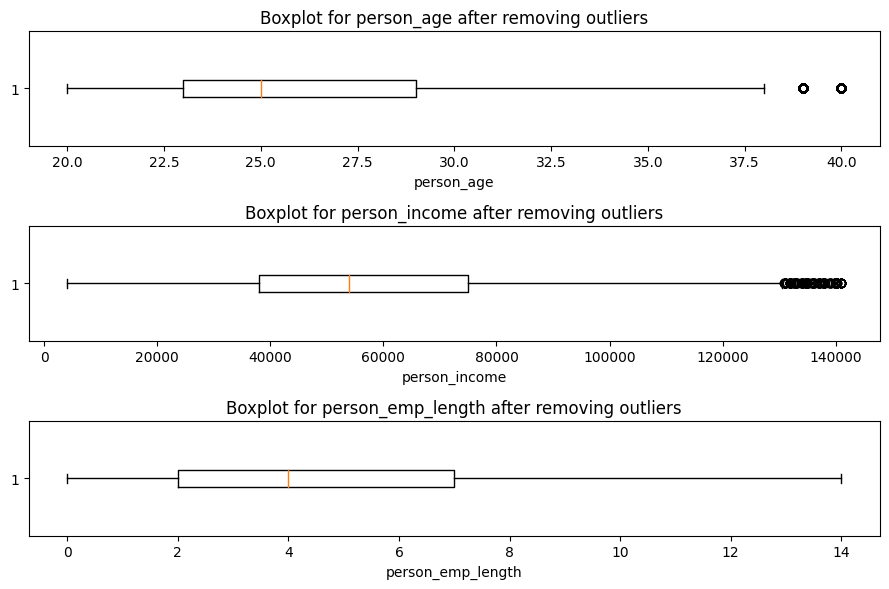

In [ ]:
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Remove outliers from numerical columns
numerical_columns = ['person_age', 'person_income', 'person_emp_length']
for column in numerical_columns:
    df = remove_outliers(df, column)

    # Plotting boxplots for the filtered columns
plt.figure(figsize=(9, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 1, i)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxplot for {column} after removing outliers')
    plt.xlabel(column)

    plt.tight_layout()
plt.show()

This boxplot show the columns after you have removed the outliers.

**FEATURE ENGINEERING**

In [ ]:
#generating mask for the upper triangule
#np.triu(np.ones_like(numeric_data.corr()))

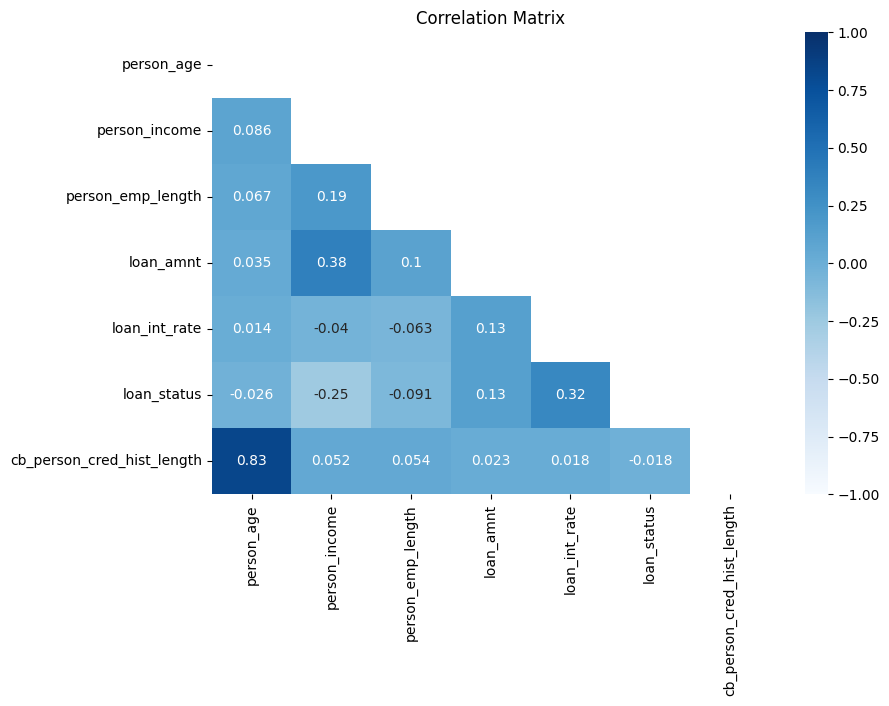

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical data
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#showing correlation of features and target variables
numeric_data.corr()[['loan_status']].sort_values(by='loan_status', ascending=False)

,loan_status
loan_status,1.000000
loan_int_rate,0.321959
loan_amnt,0.127198
cb_person_cred_hist_length,-0.017994
person_age,-0.025776
person_emp_length,-0.090631
person_income,-0.251473


From this graph we are looking for columns which have a higher correlation to our target variable loan_status. By this you want to identify how a change in one varaible affect the our target varable.On this graph we can see loan_int_rate has a higher correlation to target variable.

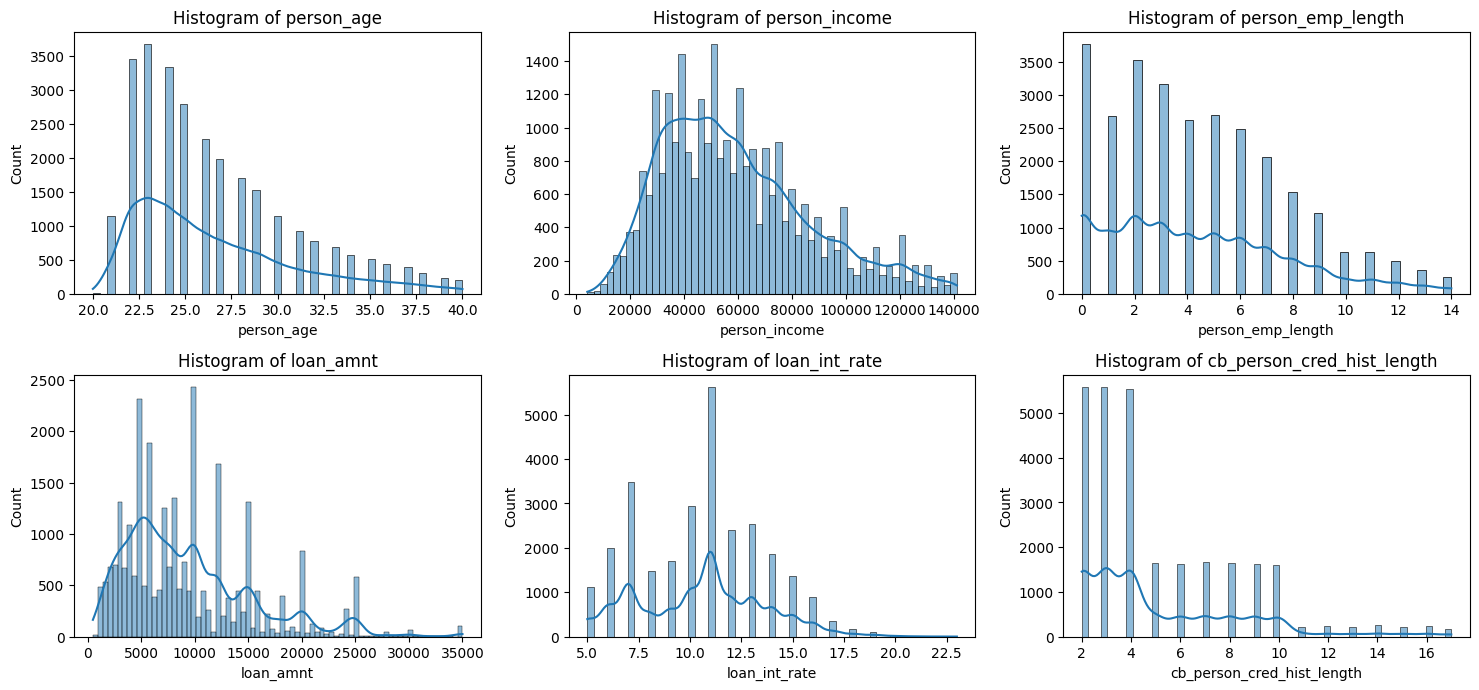

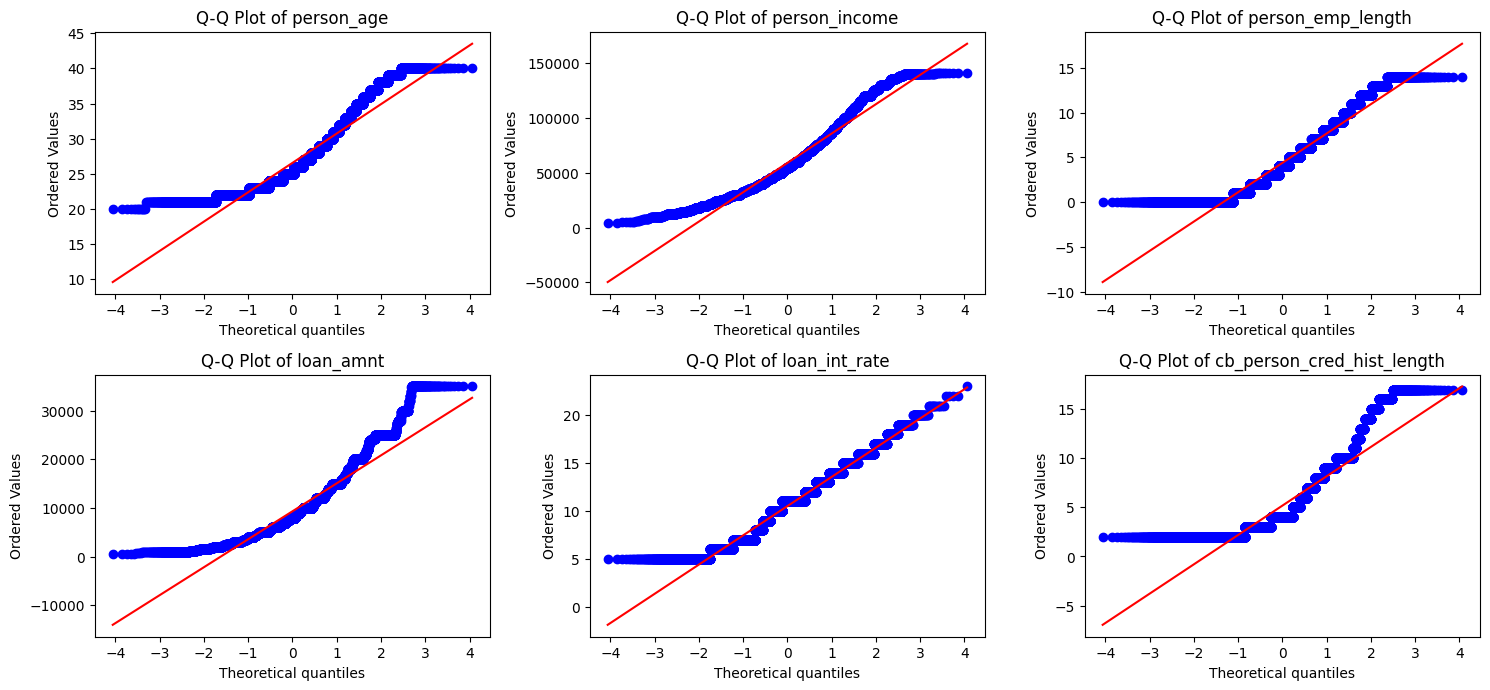

In [ ]:
import scipy.stats as stats

#numeric_data = df.select_dtypes(include=[np.number]).columns
df_log_transformed =['person_age','person_income','person_emp_length','loan_amnt', 'loan_int_rate','cb_person_cred_hist_length']
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_log_transformed, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Plot Q-Q plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_log_transformed, 1):
    plt.subplot(3, 3, i)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
plt.tight_layout()
plt.show()

# Check if log transformation is needed
log_transformed_columns = ['person_income', 'loan_amnt', 'person_age','person_emp_length','cb_person_cred_hist_length']
df_log_transformed = df.copy()

Most of our data columns are skewed to the left;fatter tail on the left side of the distribution(mean of negatively skewed data will be less than the median). Skewness reduces model accurracy and thus needs to made normal to avoid faulty decision-making

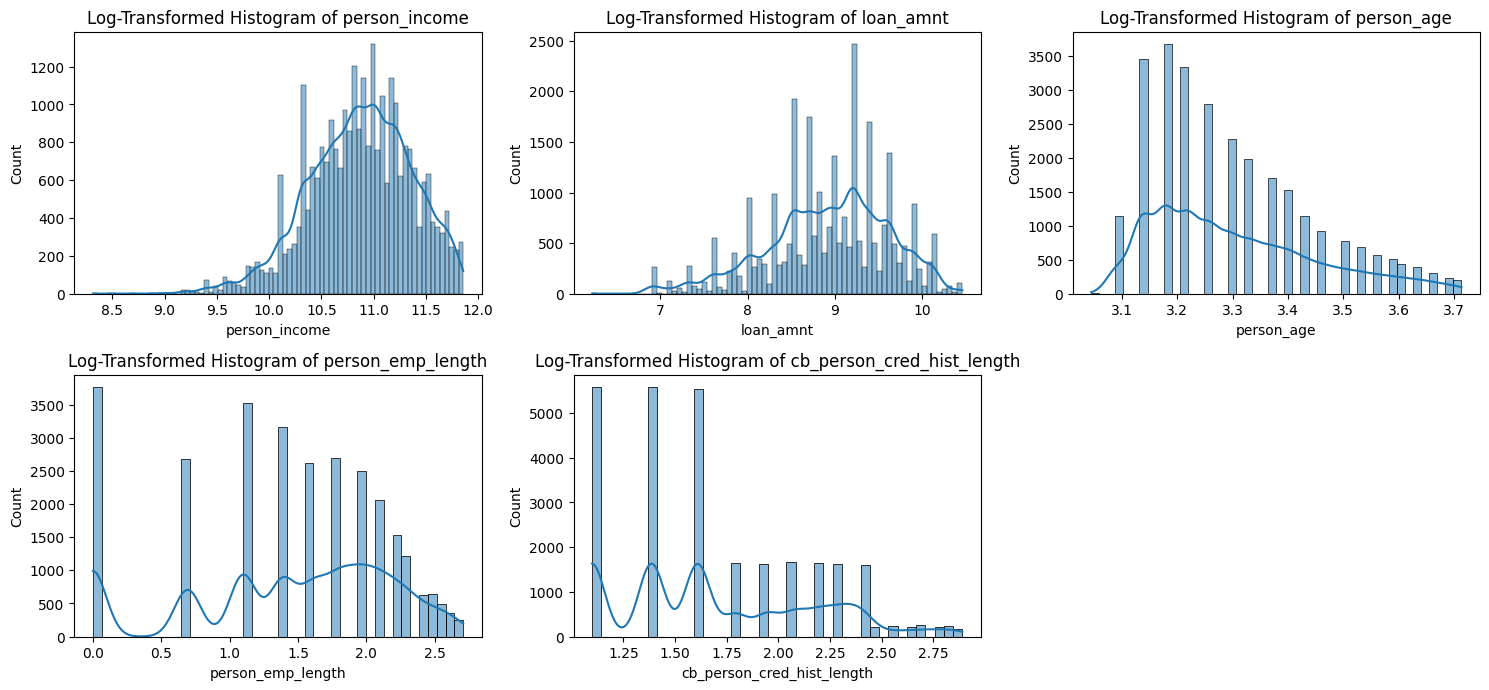

In [ ]:
# Apply log transformation to specified columns
for column in log_transformed_columns:
    df_log_transformed[column] = np.log1p(df_log_transformed[column])  # Use log1p to avoid log(0)

# Plot histograms for log-transformed columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(log_transformed_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_log_transformed[column], kde=True)
    plt.title(f'Log-Transformed Histogram of {column}')
plt.tight_layout()
plt.show()

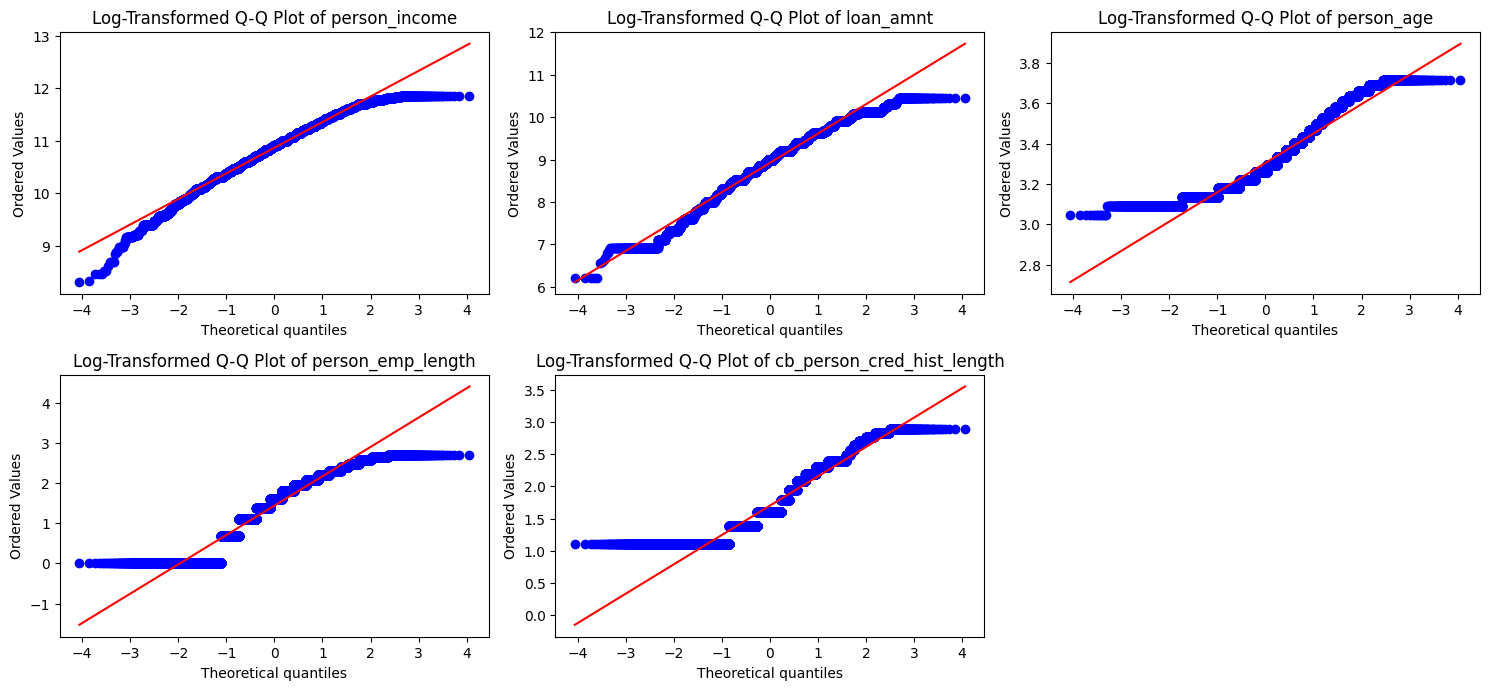

In [ ]:
# Plot Q-Q plots for log-transformed columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(log_transformed_columns, 1):
    plt.subplot(3, 3, i)  # Adjust to 2 rows and 2 columns for log-transformed columns
    stats.probplot(df_log_transformed[column], dist="norm", plot=plt)
    plt.title(f'Log-Transformed Q-Q Plot of {column}')
plt.tight_layout()
plt.show()

The Data was Skwed and thus used log transformation to have the data as normal. log transformation is used to reduce the skwennes of a measurement variable.

In [ ]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']

# Encode categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

#viewing
LabelEncoder()


LabelEncoder()

Doing label encoding to categorical columns so as to have numerical values that can be used on machine learning algorithms.label enconding gives each categorical value a unique distinct numerical value, enabling machine learning algorithms to interpet and analyze the data effectively.

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5,1,1,1000,11,0,0,2
2,25,9600,0,1,3,2,5500,12,1,0,3
3,23,65500,3,4,3,2,35000,15,1,0,2
4,24,54400,3,8,3,2,35000,14,1,1,4
5,21,9900,2,2,5,0,2500,7,1,0,2


In [ ]:
# Find the highest value in the 'person_age' column
max_value = df['person_age'].max()

print(f"The highest value in the 'person_age' column is: {max_value}")

The highest value in the 'person_age' column is: 40


In [ ]:
# Importing library
#from sklearn.preprocessing import LabelEncoder
#Ml_data =pd.DataFrame(df)

# Encode categorical variables
#label_encoder = LabelEncoder()
# Identify the categorical columns
#categorical_columns = Ml_data.select_dtypes(include=['object']).columns

# Perform one-hot encoding on the categorical columns
#Ml_data = pd.get_dummies(Ml_data, columns=categorical_columns)

# Display the first few rows of the resulting DataFrame
# Viewing
#label_encoder


In [ ]:
# Save the cleaned data to a CSV file
df.to_csv('ml_data.csv', index=False)

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5,1,1,1000,11,0,0,2
2,25,9600,0,1,3,2,5500,12,1,0,3
3,23,65500,3,4,3,2,35000,15,1,0,2
4,24,54400,3,8,3,2,35000,14,1,1,4
5,21,9900,2,2,5,0,2500,7,1,0,2


In [ ]:
from google.colab import files

files.download('ml_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**MODEL TRAINING**

In [ ]:
#separate the target variable with the other independent features
# Resources
X = df.drop(columns=['loan_status'], axis=1)

# Target variable
y = df['loan_status']

In [ ]:
print(X.shape)
print(y.shape)

(28120, 10)
(28120,)


MODELS

This is a classification task and we are going to use classification algorithms to build a model that will have the best performance. the algorithms to use are:


1.   logistic Regression
2.   Decision Tree

1.   K Nearest Neighbor(KNN)
2.  Random Forest

1.   neural networks
2.   List item




